# Projeto Final - T319 (2S2023)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção para anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão consideradas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Coloque os nomes dos integrantes do grupo no campo de texto abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

## Exercícios

### 1) Exercício sobre a escolha do passo de aprendizagem




1. Execute a célula de código abaixo para importar as bibliotecas necessárias e definir algumas funções necessárias para o treinamento.

**DICAS**

+ Veja que a função `gradientDescent` utiliza **decaimento temporal** do passo de aprendizagem para tornar o aprendizado do algoritmo mais comportado.

In [21]:
# Import all necessary libraries.
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Reseta o gerados de sequências pseudo-aleatórias.
seed = 42
np.random.seed(seed)

def timeBasedDecay(alpha_init, k, t):
    '''Decaimento temporal.'''
    return alpha_init / (1.0 + k*t)

def gradientDescent(X, y_noisy, n_epochs, alpha_init, k):
    '''
    Função que implementa a versão estocástica do gradiente descendente.
    Os parâmetros de entrada da função são:
    * X          - Matriz de atributos
    * y          - vetor de rótulos
    * n_epochs   - número de épocas
    * alpha_init - valor inicial do passo de aprendizagem
    * k          - taxa de decaimento da redução temporal do passo de aprendizagem
    '''

    # Number of examples.
    N = len(y_noisy)
    
    # Reshape y to be a column vector.
    y_noisy = y_noisy.reshape(N,1)
    
    # Initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*N+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create vector to store eta history.
    alpha_hist = np.zeros((n_epochs*N))

    update_prev = np.zeros((2, 1))

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*N+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    update_hist = np.zeros((2, n_epochs*N))

    gradient_hist = np.zeros((2, n_epochs*N))

    # Stocastic gradient-descent loop.
    iteration = 0
    # Época de treinamento, apresenta todas os exemplos de treinamento ao modelo.
    for epoch in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)    

        # Iteração de treinamento, apenas um exemplo é apresentado ao modelo.
        for i in range(N):
            # Retrieve one pair of atribute vector and label.
            random_index = shuffled_data_set_indexes[i]
            xi = X[random_index:random_index+1]
            yi = y_noisy[random_index:random_index+1]

            # Decaimento temporal do passo de aprendizagem.
            alpha = timeBasedDecay(alpha_init, k, epoch*N + i)

            # Cálculo da estimativa do vetor gradiente com apenas uma amostra.
            gradient = -2.0*xi.T.dot(yi - xi.dot(a))
            update = alpha*gradient
            a = a - update

            # Armazena o histórico de valores.
            a_hist[:, epoch*N+i+1] = a.reshape(2,)
            alpha_hist[epoch*N+i] = alpha
            update_hist[:, epoch*N+i] = update.reshape(2,)
            gradient_hist[:, epoch*N+i] = gradient.reshape(2,)

            # Calcula o MSE por itereção de treinamento.
            Jgd[epoch*N+i+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
            
            # Incrementa o contador de iterações.
            iteration = epoch*N+i
            
    return a, Jgd, a_hist, alpha_hist, update_hist, gradient_hist, iteration

2. Execute a célula de código abaixo para criar o conjunto de dados que será usado neste exercício.

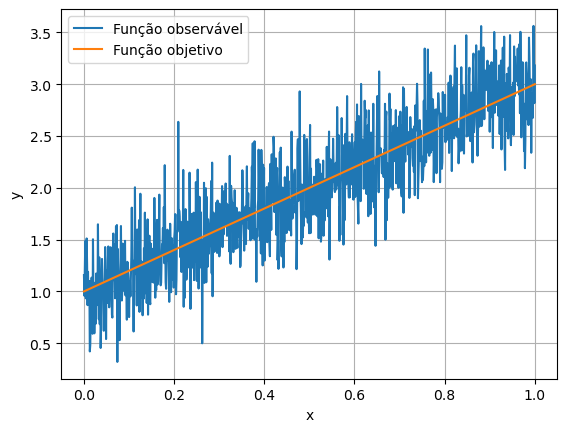

In [22]:
# Número de amostras
N = 1000

# Vetor de atributos.
x = np.linspace(0, 1, N).reshape(N, 1)

# Função objetivo.
y = 1 + 2*x

# Ruído.
w = np.sqrt(0.1)*np.random.randn(N, 1)

# Função observável.
y_noisy = y + w

# Cria matriz de atributos.
X = np.c_[np.ones((N, 1)), x]

# Figura comparando as duas funções.
plt.plot(x, y_noisy, label='Função observável')
plt.plot(x, y, label='Função objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

3. Divida o conjunto total de amostras em conjuntos de treinamento e validação. O conjunto de treinamento deve conter 75% do total de amostras e o conjunto de validação os 25% restantes.

**DICAS**

+ Use a função `train_test_split` e a configure com os seguintes parâmetros `test_size=0.25` e `random_state=seed`.

In [23]:
# Digite o código do exercício aqui.

4. Execute a célula de código abaixo e analise as figuras geradas.

A célula abaixo treina o modelo de regressão usando a função `gradientDescent` com os seguintes valores: 
+ **taxa de decaimento ($k$)**: 0.1, 0.01, e 0.001.
+ **passo de aprendizagem ($\alpha$)**: 0.1, 0.03, 0.01, 0.003, e 0.001.

Cada figura mostra o erro de treinamento em função das iterações de treinamento para um valor específico da taxa de decaimento ($k$) e vários valores para o passo de aprendizagem ($\alpha$). O valor de taxa de decaimento ($k$) é mostrado no título (i.e., topo) da figura, enquanto os diferentes valores de passo de aprendizagem ($\alpha$) são mostrados com cores diferentes na legenda de cada figura.

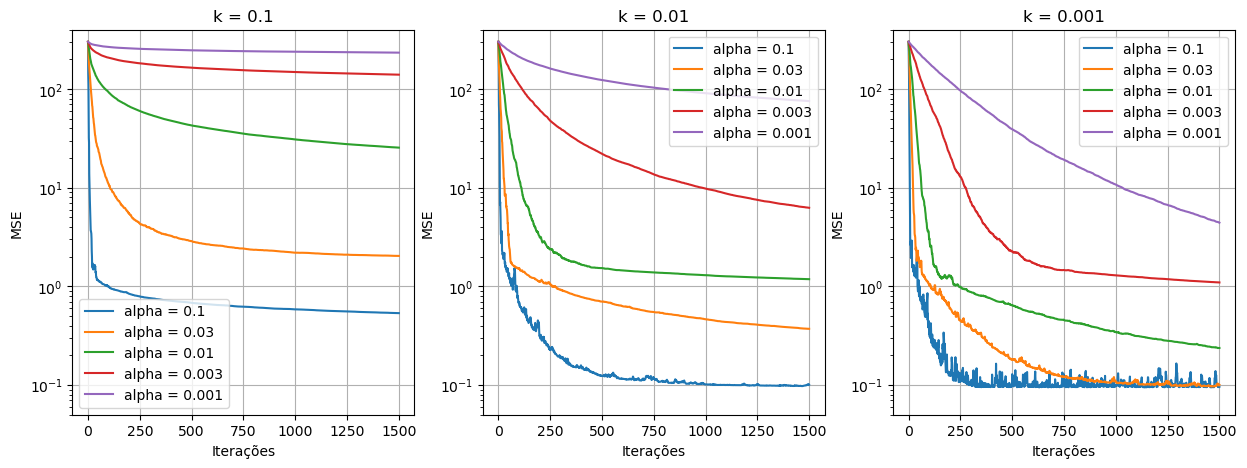

In [24]:
# Número de épocas.
n_epochs = 2
# Lista de taxas de decaimento.
k_list = [0.1, 0.01, 0.001]
# Lista de passos de aprendizagem.
alpha_list = [0.1, 0.03, 0.01, 0.003, 0.001]

# Lista para armazenar os erros das combinações de taxa de decaimento e passo de aprendizagem.
error = []
for k in k_list:
    error_hist = []
    for alpha in alpha_list:
        a, Jgd, a_hist, alpha_hist, update_hist, gradient_hist, iteration = gradientDescent(X_train, y_train, n_epochs, alpha_init=alpha, k=k)
        error_hist.append(Jgd)
    error.append(error_hist)

# Visualização do erro durante o treinamento de cada passo de aprendizagem.
plt.figure(figsize=(15,5))
for i in range(len(k_list)):
    plt.subplot(1, 3, i+1)
    plt.title('k = '+str(k_list[i]))
    for j in range(len(alpha_list)):
        plt.plot(np.arange(error[i][j].shape[0]), error[i][j], label=('alpha = '+f'{alpha_list[j]}'))
        plt.yscale('log')
    plt.xlabel('Iterações')
    plt.ylabel('MSE')
    plt.legend()
    plt.legend()
    plt.grid()
    plt.ylim([0.05, 400])
plt.show()

5. Analise as figuras do item anterior e responda: Quais são os valores ideais para a taxa de decaimento ($k$) e o passo de aprendizagem ($\alpha$)? (**Justifique sua resposta**).

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>


6. De posse dos valores ideais para a taxa de decaimento ($k$) e passo de aprendizagem ($\alpha$), treine novamente o modelo com estes valores e imprima os erros quadráticos médios (MSEs) obtidos para os conjuntos de treinamento de validação e o valor dos pesos $\hat{a}_0$ e $\hat{a}_1$.
 
**DICAS**

+ Os parâmetros de entrada da função `gradientDescent` são descritos em seu cabeçalho. Veja a definição da função.
+ Treine o modelo com o conjunto de treinamento.
+ Configure o **número de épocas**, `n_epochs`, com o valor `2`, ou seja, o modelo será treinado por 2 épocas.

In [1]:
# Digite o código do exercício aqui.

7. Treine um modelo usando a equação normal. Ao final, imprima o erro quadrático médio (MSE) obtido pelo modelo para os conjuntos de treinamento e validação. Além disso, imprima o valor dos pesos $\hat{a}_0$ e $\hat{a}_1$.

**DICAS**

+ Você pode utilizar a classe `LinearRegression` da biblioteca SciKit-Learn para resolver este item ou implementar a equação normal manualmente.
+ Caso você use a classe `LinearRegression`, a configure com o parâmetro `fit_intercept=False`, pois a matriz de atributos criada no item 1 do exercício, já contém a coluna do atributos de bias, ou seja, a coluna com todos os valores iguais a 1.
+ Usando a classe `LinearRegression`, os pesos do modelo podem ser acessados através do atributo `coef_` da classe `LinearRegression`. Por exemplo, dado que o nome do objeto da classe `LinearRegression` é `reg`, então `reg.coef_[0,0]` acessa o valor ótimo encontrado para o peso $\hat{a}_0$ e `reg.coef_[0,1]` acessa o valor ótimo encontrado para o peso $\hat{a}_1$.
+ Use a função `mean_squared_error` da biblioteca SciKit-Learn para calcular o erro quadrático médio.

In [2]:
# Digite o código do exercício aqui. 

8. Compare os pesos ($\hat{a}_0$ e $\hat{a}_1$) e os MSEs (para os conjuntos de treinamento e validação) obtidos com os modelos usando a equação normal (item 7) e o gradiente descendente estocástico com os melhores valores para a taxa de decaimento e passo de aprendizagem (item 6).

Os valores são diferentes? Se sim, explique o motivo das diferenças. (**Justifique sua resposta**).

**DICAS**

+ Lembre-se que a equação normal dá a solução ótima, ou seja, ela fornece os pesos que minimizam o erro quadrático médio (MSE). Não existem outros pesos que resultem em um MSE menor para o conjunto de treinamento usado.
+ O gradiente descendente estocástico, mesmo com os valores ideais para a taxa de decaimento e passo de aprendizagem, continua sendo ruidoso, consequentemente, as atualizações dos pesos também serão ruidosas.
+ Reveja o material de aula e os exemplos onde discutimos as versões do gradiente descendente.

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>


### 2) Exercício sobre regressão polinomial para aproximação de FDPs desconhecidas.

Em diversas áreas, inclusive em telecomunicações, podemos encontrar, em determinados problemas, variáveis aleatórias que não possuem formas conhecidas para suas funções densidade de probabilidade (FDP). Nestes casos, podemos recorrer à aproximação de funções como uma forma de encontrar uma função que aproxime os valores observados desta variável aleatória. Portanto, neste exercício, você deve encontrar uma função que aproxime os dados observados de uma variável aleatória.

1. As observações da variável aleatória com FDP desconhecida são geradas com o trecho de código abaixo. Portanto, execute código abaixo e analise o resultado.

**Dicas**

+ Sempre que possível, usem a semente (`seed`) definida na célula de código abaixo.
+ Este exercício consume muita memória RAM. Portanto, para que você não encontre problemas durante sua execução, use o Google Colab.

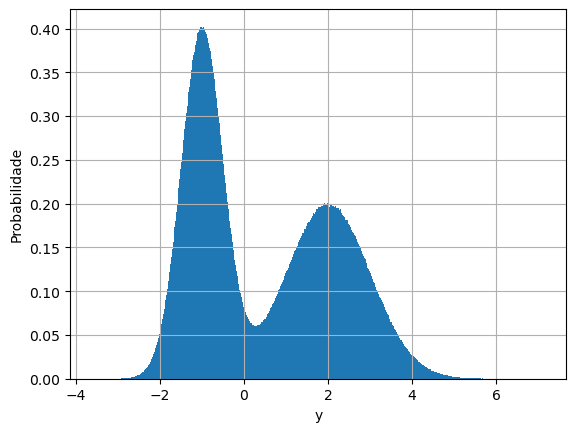

X.shape: (1000, 1)
y.shape: (1000,)


In [5]:
# Importando todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoCV

# Reset do gerador de sequências pseudo-aleatórias.
seed = 42
np.random.seed(seed)

# Número de amostras.
N = 10000000

# Distribuição Normal a.
mu_a = -1      # Média de a.
sigma_a = 0.5  # Desvio padrão de a.

# Distribuição Normal b.
mu_b = 2       # Média de b.
sigma_b = 1    # Desvio padrão de b.

# Distribuição Bimodal.
h = np.c_[sigma_a*np.random.randn(1, N) + mu_a, sigma_b*np.random.randn(1, N) + mu_b]
h = h.reshape(2*N,)

# Número de divisões do histograma.
bins = 1000
y, X, p = plt.hist(h, bins=bins, density=True)
plt.ylabel('Probabilidade')
plt.xlabel('y')
plt.grid()
plt.show()

# Redimensionando o vetor de atributos.
X = X[0:len(X)-1].reshape(bins,1)

# Imprimindo as dimensões.
print('X.shape:', X.shape)
print('y.shape:', y.shape)

2. Com a matriz de atributos, X, e o vetor de rótulos, y, obtidos no item anterior, utilize a técnica de validação cruzada k-Fold para escolher a melhor ordem para o modelo de aproximação da FDP. Plote gráficos com a média e o desvio padrão do erro quadrático médio (MSE) em função dos graus de polinômio considerados. 

Para isso, faça:

 1. Use o **k-Fold** com **k** igual a 10 e o parâmetro `random_state=0`.
 2. Faça a análise de polinômios de ordem 1 até 30, **inclusive**.
 3. Inclua o atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
 4. Use a classe `StandardScaler` para escalonar os dados.

**Dicas** 

+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ O tempo de execução dese exercício é longo. Portanto, pegue um café e tenha paciência.
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [3]:
# Digite o código do exercício aqui.

3. Após analisar os resultados do item anterior, responda: Qual a melhor ordem do polinômio para esse problema? **Justifique sua resposta.**

**Dicas**

+ Use o princípio da navalha de Occam para escolher a ordem do polinômio.

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

4. De posse da melhor ordem, treine um novo modelo de regressão considerando esta ordem e, no final, imprima o valor do erro quadrático médio para (MSE).

**Dicas**

+ Inclua o termo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
+ Use a classe `StandardScaler` para padrinizar os atributos.
+ Use o conjunto total de amostras para calcular o erro.
+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [4]:
# Digite aqui o código do exercício.

5. Apresente uma figura comparando a predição feita pelo melhor regressor com os dados originais.

**Dicas**

+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [5]:
# Digite aqui o código do exercício.

6. O que aconteceria se a ordem do modelo fosse bem menor do que a que você escolheu (por exemplo, três vezes menor)? **Justifique sua resposta.**

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>


7. Escolha uma ordem bem menor do que a que você usou no item 4 (por exemplo, três vezes menor) e apresente uma figura comparando a predição feita por esse modelo com ordem bem menor com os dados originais.

In [6]:
# Digite aqui o código do exercício.

### 3) Usando regressão para estimar calorias queimadas.

Neste exercício, você utilizará uma técnica de **validação cruzada** para encontrar um modelo que estime a quantidade de calorias queimadas após uma atividade física com base em um conjunto de dados coletados. As informações das **colunas** contidas no conjunto de dados seguem abaixo. O objetivo é utilizar os atributos para estimar a quantidade de calorias queimadas.

|            |                   **Atributos**                   |
|:----------:|:-------------------------------------------------:|
|   User_ID  |              Identificação do usuário             |
|   Gender   |                       Gênero                      |
|     Age    |                       Idade                       |
|   Height   |                       Altura                      |
|   Weight   |                        Peso                       |
|  Duration  |            Duração da atividade física            |
| Heart_Rate | Média de batimentos cardíacos durante a atividade física |
|  Body_Temp | Média da temperatura coporal durante a atividade física |
|            |                     **Rótulo**                    |
|  Calories  |       Calorias queimadas durante a atividade física       |

1. Execute a célula abaixo para importar o conjunto de dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas do arquivo.

In [51]:
# Importe todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import urllib

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Baixa as bases de dados do dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/1zka46bw4f4z5xq/exercise.csv?dl=1', 'exercise.csv')
urllib.request.urlretrieve('https://www.dropbox.com/s/45gtml94o97bhz8/calories.csv?dl=1', 'calories.csv')
    
# Importa os arquivos CSV.
exercise_data = pd.read_csv('./exercise.csv')
calories_data = pd.read_csv('./calories.csv')

# Une as duas bases de dados.
df = exercise_data.join( calories_data.set_index('User_ID'), on='User_ID', how='left')

# Mostra uma tabela com as 5 primeiras linhas.
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


2. Execute a célula de código abaixo para aplicar um pré-processamento aos dados do conjunto.

+ Como os modelos de regressão esperam valores numéricos, devemos alterar os valores textuais da coluna `Gender` em valores numéricos. A string `male` é alterada para o valor 0 e a string `female` é alterada para o valor 1.
+ Na sequência, a coluna `User_ID` é removida, pois ela não é um atributo e, portanto, não traz informação útil para a regressão.

In [52]:
# Mapeia as strings em valores numéricos.
df.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

# Remove a coluna 'User_ID'.
del df[ 'User_ID' ]

# Mostra uma tabela com as 5 primeiras linhas.
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


3. Execute a próxima célula de código para criar a matriz de atributos, $\textbf{X}$, e o vetor de rótulos, $\textbf{y}$.

**DICAS**

+ A primeira linha de comando remove da matriz de atributos a coluna `Calories`, pois ela será nosso rótulo.
+ A segunda linha cria o vetor de rótulos contendo apenas a coluna `Calories`.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [53]:
# Criando a matriz de atributos e o vetor de rótulos.
X = df.drop('Calories', axis=1)
y = df['Calories']

# Atributos.
print('Dimensão da matriz de atributos:', X.shape)
# Rótulos.
print('Dimensão do vetor de rótulos:',y.shape)

Dimensão da matriz de atributos: (15000, 7)
Dimensão da matriz de rótulos: (15000,)


4. Com a matriz de atributos, $\textbf{X}$, e o vetor de rótulos, $\textbf{y}$, obtidos no item anterior, utilize a técnica de validação cruzada k-Fold para escolher a melhor ordem para um modelo de regressão polinomial. 

Para isso, faça o seguinte:

1. Use o **k-Fold** instanciado com os seguintes parâmetros `n_splits=10`, `shuffle=True` e `random_state=seed`.
2. Faça a análise de **polinômios** de ordem 1 até 7, **inclusive**.
3. Para realizar a validação cruzada com o **k-Fold**, use a função `cross_val_score` com o seguinte parâmetro `scoring='neg_mean_squared_error'`.
4. Use a classe `StandardScaler` para padronizar os dados.
5. Use a classe `LinearRegression` para realizar a regressão propriamente dita.
6. Plote gráficos com a média e o desvio padrão do erro quadrático médio em função do grau do polinômio.

**DICAS** 

+ O tempo de execução desse exercício é de aproximadamente 10 minutos, mas pode variar de computador para computador, portanto, pegue um café e tenha paciência.
+ Use o princípio da navalha de Occam para escolher a ordem do polinômio.
+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [7]:
# Digite o código do exercício aqui.

5. Após analisar os resultados do item anterior responda: Qual a melhor ordem do polinômio para esse problema? **Justifique sua resposta**.

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

6. De posse da melhor ordem, treine um novo modelo considerando esta ordem e no final imprima o valor do erro quadrático médio (MSE) para os conjuntos de treinamento e de validação.

Para isso, faça o seguinte

1. Separe 75% do conjunto de dados para o treinamento e 25% para o conjunto de validação com o parâmetro `random_state=seed`.
2. Crie um pipeline com as seguintes ações:
    + `PolynomialFeatures` com a ordem escolhida.
    + `StandardScaler` para padronizar os dados.
    + `LinearRegression` para encontrar os pesos da função hipótese polinomal.
3. Treine o modelo com o conjunto de treinamento.
4. Faça predições com o modelo treinando usando os conjuntos de treinamento e validação.
5. Calcule e imprima o MSE entre as predições feitas pelo modelo e os rótulos dos conjuntos de treinamento e validação.

**DICAS**

+ Para resolver este item, se baseie no seguinte exemplo: [validacao_cruzada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/validacao_cruzada.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [8]:
# Digite o código do exercício aqui.

7. Comparando os dois erros obtidos no item anterior, erros de treinamento e validação. Você diria que o modelo está subajustando, sobreajustando ou encontrou uma relação de compromisso entre generalização e flexibilidade (ou capacidade)? **Justifique sua resposta**.

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

### 4) Exercício sobre gradiente descendente estocástico com função hipótese não-linear.

Neste exercício usaremos a implementação do gradiente descendente (GD) em mini-batches configurada para funcionar como a versão estocástica juntamente com uma função hipótese não-linear.

O objetivo do exercício é demonstrar que o gradiente descendente estocástico (GDE) com uma função hipótese não linear em relação aos pesos pode ser usada para resolver um outro tipo de problema de aprendizado supervisionado que discutimos rapidamente durante a nossa primeira aula.

A função hipótese que iremos usar é não-linear no sentido em que os valores de saída da função não podem ser expressos como combinações lineares dos valores de entrada (i.e., rótulos) em relação aos pesos.

1. Execute a célula de código abaixo e analise os valores impressos e a figura.

**Dicas**

+ A matriz $\textbf{X}$ é uma matriz de dimensões $N \times 2$, onde cada coluna representa um dos dois atributos, $x_1$ e $x_2$, mostrados na figura.
+ Veja que os rótulos assumem apenas dois valores: 0 ou 1.
+ Perceba que as amostras assumem cores diferentes dependendo do valor do seu rótulo. Amostras com rótulo igual a 0 são plotadas na cor azul e amostras com rótulo igual a 1 são plotadas na cor laranja.
+ Perceba também que duas **distribuições** distintas de dados são plotadas.
+ Note que os rótulos são discretos, assumindo apenas 2 valores, 0 ou 1.

Dimensões de X: (1000, 2)
Dimensões de y: (1000, 1)
Alguns valores do vetor de rótulos, y: [[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]


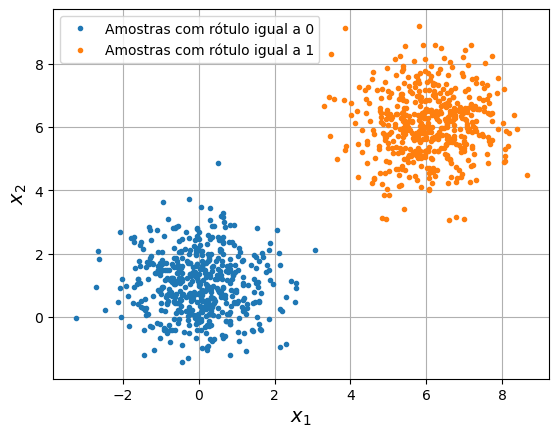

In [14]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import urllib

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)
random.seed(seed)

# Retrieve the dataset from dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/wt2aurqb70uoa1i/projeto_T319_clf_2S2023.csv?dl=1', 'projeto_T319_clf_2S2023.csv')

# Read the CSV file.
df = pd.read_csv('projeto_T319_clf_2S2023.csv', header=None)

# Convert dataFrames into numpy arrays.
X = df.iloc[:, :2].to_numpy()
y = df[2].to_numpy().reshape(X.shape[0], 1)

# Print the dimension of the arrays.
print('Dimensões de X:', X.shape)
print('Dimensões de y:', y.shape)
print('Alguns valores do vetor de rótulos, y:', y[0:10])

# Plot the samples.
idx0 = np.argwhere(y==0)[:,0]
idx1 = np.argwhere(y==1)[:,0]
plt.plot(X[idx0,0], X[idx0,1],'.', label='Amostras com rótulo igual a 0')
plt.plot(X[idx1,0], X[idx1,1],'.', label='Amostras com rótulo igual a 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

2. Implemente uma função chamada `hypothesis` que implementa a seguinte função hipótese:

$$\hat{y} = f ( g(x_1, x_2) ),$$

onde $f$ é a função degrau unitário, a qual é definida como
$$f(z) = \begin{cases}
			0, & \text{se $z$ < 0}\\
            1, & \text{se $z$ = 0}\\
            1, & \text{se $z$ > 0}
		 \end{cases},$$
e a função $g(x_1, x_2)$ é definida como
$$g(x_1, x_2) = \hat{a}_0 + \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

Perceba que esta função hipótese não é linear, pois sua saída é o resultado de passar a função linear $g(x_1, x_2)$ através da função degrau unitário, $f(z)$.

**Dicas**

+ Sua função deve ter obrigatoriamente o nome `hypothesis`.
+ Sua função deve ter dois parâmetros de entrada, a matriz de atributos, $\textbf{X}$, e o vetor de pesos, $\textbf{a}$.
+ Passe os argumentos para a função na seguinte ordem: $\textbf{X}$ e depois $\textbf{a}$.
+ A função deve retornar o vetor $\hat{y}$, que é a saída da função degrau.
+ Você pode implementar a função degrau manualmente ou usar a função `heaviside` da biblioteca numpy (https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html).
+ Veja abaixo um template da função que você precisa implementar. Note que você ainda precisa implementar a função da forma como especificada acima.
```python
def hypothesis(X, a):
    # escreva aqui o código que implementa a função degrau unitário.
    return y_chapeu
```

In [15]:
# Defina aqui a função hypothesis.

3. Execute a célula de código abaixo e analise o código.

A célula abaixo apresenta a implementação do gradiente descendente (GD) em mini-batches com a função hipótese linear trocada pela função hipótese não-linear (`hypothesis`) implementada no item anterior.

A função linear foi trocada pela função não-linear, `hypothesis`, nos pontos do código onde: 
  + Ocorrem os cálculos do erro quadrático médio (MSE).
  + Ocorre o cálculo do vetor gradiente.

In [16]:
def gradientDescentMiniBatch(X, y, alpha, n_epochs, mb_size):
    '''
    Mini-batch gradient descent.
    Entrada:
        X:        matriz de atributos
        y:        vetor de rótulos
        alpha:    passo de aprendizagem
        n_epochs: número de épocas
        mb_size:  tamanho do mini-batch
    Saída:
        a:         vetor de pesos
        Jgd:       vetor de erro ao longo das iterações de treinamento
        a_hist:    histórico de vetores de peso
        grad_hist: histórico de vetores gradiente
        inc:       contador de iterações de treinamento
    '''
    
    # Number of samples.
    N = len(y)
    
    # Number of attributes.
    attr = X.shape[1]
    
    # Random initialization of parameters.
    a = np.random.randn(attr, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((attr, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(attr,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    # Calcute the MSE for the very first weight vector.
    Jgd[0] = (1.0/N)*sum(np.power(y - hypothesis(X, a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((attr, n_epochs*(N//mb_size)))

    # Mini-batch gradient-descent loop.
    inc = 0
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)

        for i in range(0, N//mb_size):

            start = i*mb_size
            end = mb_size*(i+1)
            batch_indexes = shuffled_data_set_indexes[start:end]

            xi = X[batch_indexes]
            yi = y[batch_indexes]

            gradients = -(2.0/mb_size)*xi.T.dot(yi - hypothesis(xi, a))
            a = a - alpha*gradients

            Jgd[inc+1] = (1.0/N)*sum(np.power((y - hypothesis(X, a)), 2))

            grad_hist[:, inc] = gradients.reshape(attr,)
            a_hist[:, inc+1] = a.reshape(attr,)

            inc = inc + 1
            
    return a, Jgd, a_hist, grad_hist, inc

4. Configure a versão do GD em mini-batches definida na célula de código acima para funcionar como a **versão estocástica** (GDE) e encontre os pesos da função hipótese.

**Dicas**

+ Não se esqueça de criar a matriz de atributos seguindo o formato especificado na função $g(x_1, x_2)$ definida no item 2.
+ Encontre os melhores valores para o número de épocas e passo de aprendizagem de forma que o algoritmo convirja.
+ **O erro deve convergir para o valor 0, ou seja, ao final do treinamento o erro deve ser igual a 0.**

In [17]:
# Digite aqui o código do item.

5. Plote a figure do erro em função das iterações de treinamento.

In [9]:
# Digite aqui o código do item.

6. Execute a célula de código abaixo e analise o resultado.

**Dicas**

+ O código abaixo só irá funcionar caso você tenha implementado a função `hypothesis` corretamente.

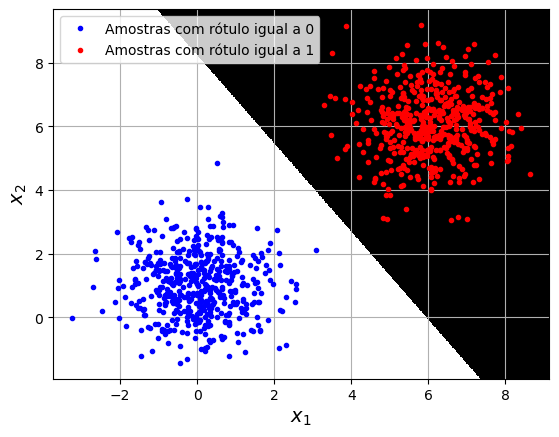

In [19]:
# Point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# Step size in the mesh
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = hypothesis(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], a).reshape(len(xx.ravel()),)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='Greys') 

# Plot also the training points
plt.plot(X[idx0,0], X[idx0,1],'.b', label='Amostras com rótulo igual a 0')
plt.plot(X[idx1,0], X[idx1,1],'.r', label='Amostras com rótulo igual a 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend()

plt.show()

7. Execute a célula de código abaixo, analise os valores de saída das funções $g(x_1, x_2)$ e $f(z)$, respectivamente, para alguns pontos distintos (i.e., pares de atributos $x_1$ e $x_2$) e a figura com estes respectivos pontos.

**Dicas**

+ Os vetores de pontos são vetores linha com 3 elementos, $x_0$, $x_1$ e $x_2$, respectivamente, onde $x_0$ é sempre igual a 1.
+ Perceba que se o ponto está à esquerda da mudança abrupta de cores (branco/preto) o valor de $g(x_1, x_2)$ é negativo e, consequentemente, $f(z)$ será igual a 0, de acordo com o que foi definido no item 2.
+ Perceba que se o ponto está à direita da mudança abrupta de cores (branco/preto) o valor de $g(x_1, x_2)$ é positivo e, consequentemente, $f(z)$ será igual a 1, de acordo com o que foi definido no item 2.
+ Perceba que se o ponto está praticamente em cima da mudança abrupta de cores (branco/preto) o valor de $g(x_1, x_2)$ é próximo de 0 e, consequentemente, $f(z)$ será igual a 1 devido à definição de $f(z)$ no item 2.

Ponto 1: x0 = 1, x1 = -3, x2 = -1
g(x1, x2): -0.16788994896999007
f(g(x1, x2)): 0.0


Ponto 2: x0 = 1, x1 = 8, x2 = 8
g(x1, x2): 0.13592795229092913
f(g(x1, x2)): 1.0


Ponto 3: x0 = 1, x1 = 6, x2 = -0.06
g(x1, x2): 6.825204255396511e-05
f(g(x1, x2)): 1.0


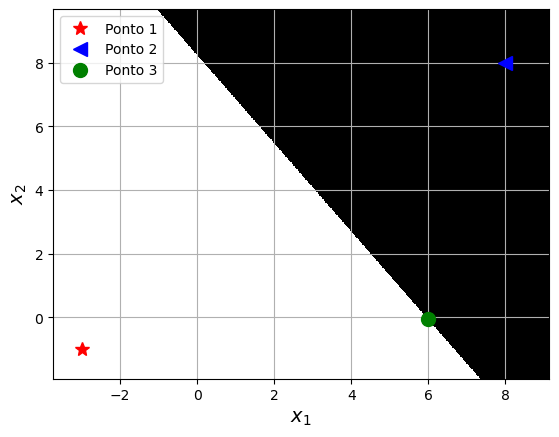

In [21]:
# Ponto 1.
p1 = np.array([[1, -3, -1]])
print('Ponto 1: x0 = 1, x1 = -3, x2 = -1')
g1 = p1.dot(a)[0,0]
print('g(x1, x2):', g1)
print('f(g(x1, x2)):', np.heaviside(g1, 1))
print('\n')

# Ponto 2.
p2 = np.array([[1, 8, 8]])
print('Ponto 2: x0 = 1, x1 = 8, x2 = 8')
g2 = p2.dot(a)[0,0]
print('g(x1, x2):', g2)
print('f(g(x1, x2)):', np.heaviside(g2, 1))
print('\n')

# Ponto 3.
p3 = np.array([[1, 6, -0.06]])
print('Ponto 3: x0 = 1, x1 = 6, x2 = -0.06')
g3 = p3.dot(a)[0,0]
print('g(x1, x2):', g3)
print('f(g(x1, x2)):', np.heaviside(g3, 1))

# Put the result into a color plot
plt.pcolormesh(xx, yy, Z, cmap='Greys') 

# Plot the points
plt.plot(p1[0, 1], p1[0, 2], '*r', markersize=10, label='Ponto 1')
plt.plot(p2[0, 1], p2[0, 2], '<b', markersize=10, label='Ponto 2')
plt.plot(p3[0, 1], p3[0, 2], 'og', markersize=10, label='Ponto 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend()

plt.show()

8. Após analisar os resultados anteriores, responda:

+ O que você pode concluir após observar os resultado anteriores (as perguntas abaixo vão te ajudar a chegar a uma conclusão)?
    + A função hipótese encontrada com o GDE se aproxima das distribuições das amostras, ou seja, ela explica as amostras coletadas ou separa as distribuições?
    + Veja que as duas figuras anteriores (itens 6 e 7) apresentam uma mudança (divisão) abrupta de cores (branco/preto). Quem define essa mudança abrupta de cores (a definição da função hipótese no item 2 e os pontos/valores plotados no item 7 vão te ajudar a responder esta pergunta)?
    + Lembrando da nossa primeira aula, onde discutimos o paradigma do aprendizado supervisionado, que tipo de problema está sendo resolvido neste exercício (reveja o slide sobre aprendizado supervisionado)?

**Justifique todas as suas respostas.**

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício.</span>
